## In this notebook, we will explore the data frame that we created earlier.

In [157]:
import pandas as pd
#pd.set_option('display.max_rows', 15)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [134]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from scipy import stats

In [159]:
data = pd.read_csv('./nba.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

Team  Year  Wins Champion  MVP  Scoring Leader  \
0             Boston Celtics  1960    59     True    0               0   
1      Golden State Warriors  1960    49    False    1               1   
2         Philadelphia 76ers  1960    45    False    0               0   
3            New York Knicks  1960    27    False    0               0   
4              Atlanta Hawks  1960    46    False    0               0   
5            Detroit Pistons  1960    30    False    0               0   
6         Los Angeles Lakers  1960    25    False    0               0   
...                      ...   ...   ...      ...  ...             ...   
1320          Denver Nuggets  2017    40    False    0               0   
1321    New Orleans Pelicans  2017    34    False    0               0   
1322        Dallas Mavericks  2017    33    False    0               0   
1323        Sacramento Kings  2017    32    False    0               0   
1324  Minnesota Timberwolves  2017    31    False    0               0   
1325      Los Angeles Lakers  2017    26    False    0               0   
1326            Phoenix Suns  2017    24    False    0               0   

      Rebound Leader  Assist Leader  WS Leader  DPOY    ...      2P Attempts  \
0                  0              1          0     0    ...             8971   
1                  1              0          1     0    ...             8678   
2                  0              0          0     0    ...             8232   
3                  0              0          0     0    ...             8153   
4                  0              0          0     0    ...             7580   
5                  0              0          0     0    ...             7920   
6                  0              0          0     0    ...             7884   
...              ...            ...        ...   ...    ...              ...   
1320               0              0          0     0    ...             4829   
1321               0              0          0     0    ...             4935   
1322               0              0          0     0    ...             4277   
1323               0              0          0     0    ...             4774   
1324               0              0          0     0    ...             5198   
1325               0              0          0     0    ...             5054   
1326               0              0          0     0    ...             5406   

        2P%    FT%   RPG   APG  STL  BLK  TOVPG    PPG  Accolades  
0     0.417  0.734  80.2  24.7  0.0  0.0    0.0  124.5         13  
1     0.409  0.669  78.9  23.9  0.0  0.0    0.0  118.6          9  
2     0.414  0.791  72.1  22.3  0.0  0.0    0.0  118.9          5  
3     0.421  0.765  70.0  22.2  0.0  0.0    0.0  117.3          5  
4     0.419  0.745  71.2  25.1  0.0  0.0    0.0  113.4         10  
5     0.397  0.729  73.2  19.6  0.0  0.0    0.0  111.6          3  
6     0.386  0.730  72.4  19.3  0.0  0.0    0.0  107.3          7  
...     ...    ...   ...   ...  ...  ...    ...    ...        ...  
1320  0.519  0.774  46.4  25.3  6.9  4.0   14.9  111.7          1  
1321  0.495  0.750  43.7  22.8  7.8  5.5   12.9  104.3          5  
1322  0.489  0.801  38.6  20.8  7.5  3.8   11.9   97.9          0  
1323  0.496  0.775  41.2  22.5  7.6  4.0   14.6  102.8          0  
1324  0.507  0.799  42.4  23.7  8.0  4.5   14.0  105.6          0  
1325  0.493  0.754  43.5  20.9  8.2  3.9   15.2  104.6          1  
1326  0.491  0.776  45.0  19.6  8.2  4.9   15.4  107.7          1  

[1327 rows x 29 columns]

#### 1) First, we want to know which team wins the most NBA championships throughout history

In [3]:
data.groupby('Team')['Champion'].sum().sort_values()

Team
Atlanta Hawks              0.0
Toronto Raptors            0.0
Sacramento Kings           0.0
Phoenix Suns               0.0
Orlando Magic              0.0
New Orleans Pelicans       0.0
Minnesota Timberwolves     0.0
                          ... 
Golden State Warriors      2.0
Miami Heat                 3.0
Detroit Pistons            3.0
San Antonio Spurs          5.0
Chicago Bulls              6.0
Los Angeles Lakers        11.0
Boston Celtics            15.0
Name: Champion, dtype: float64

- The answer is Boston Celtics with 15 titles, following by LA Lakers with 11 titles.
- It seems Boston Celtics wins many NBA Championship but let's look at how they did after 2000

In [107]:
data[data.Year >= 2000].groupby('Team')['Champion'].sum().sort_values()

Team
Atlanta Hawks             0.0
Toronto Raptors           0.0
Sacramento Kings          0.0
Portland Trail Blazers    0.0
Phoenix Suns              0.0
Philadelphia 76ers        0.0
Orlando Magic             0.0
                         ... 
Detroit Pistons           1.0
Dallas Mavericks          1.0
Cleveland Cavaliers       1.0
Boston Celtics            1.0
Miami Heat                3.0
San Antonio Spurs         4.0
Los Angeles Lakers        5.0
Name: Champion, dtype: float64

- Here we can see that they did not do so well. This means they only dominates before 2000s. And LA Lakers is the team with most NBA Championship in after 2000

#### 2) Let's look at more statistics

In [4]:
#21 out of the 57 championship teams (35%) in the df have had the season MVP on their roster
data[data['Champion'] == True]['MVP'].sum()

21.0

In [5]:
print(data[data['Champion'] == True]['FG%'].mean())
print(data['FG%'].mean())

0.4710175438596492
0.45998040693293135


- The average of Field Goal % of a champion team is not much different from others team

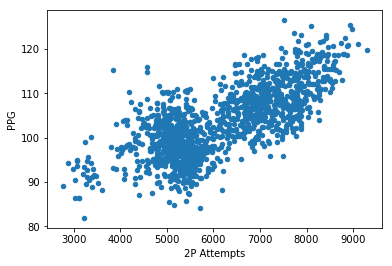

In [6]:
data.plot.scatter(x='2P Attempts', y='PPG')

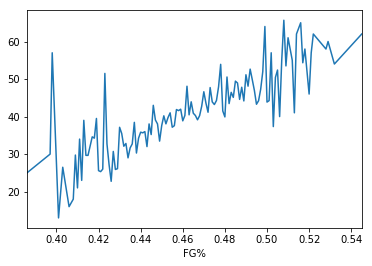

In [7]:
data.groupby('FG%')['Wins'].mean().plot()

From this plot, we can conclude there is a tendency that the more FG% a team get, the more wins they will have.

In [8]:
data.groupby('FG%')['Wins'].mean().plot

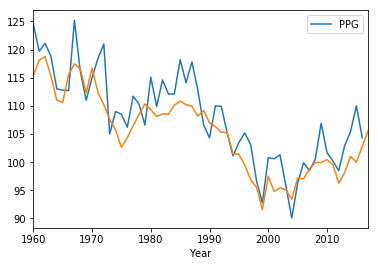

In [9]:
#Does this show league parity???
data[data['Champion'] == True].plot(x='Year', y='PPG')
data.groupby('Year')['PPG'].mean().plot()

Team    Year  Wins Champion  MVP  Scoring Leader  \
1314  Houston Rockets  2017.0  55.0    False  0.0             0.0   

      Rebound Leader  Assist Leader  WS Leader  DPOY    ...      2P Attempts  \
1314             0.0            1.0        1.0   0.0    ...           3846.0   

        2P%    FT%   RPG   APG  STL  BLK  TOVPG    PPG  Accolades  
1314  0.552  0.766  44.4  25.2  8.2  4.3   15.1  115.3        5.0  

[1 rows x 29 columns]

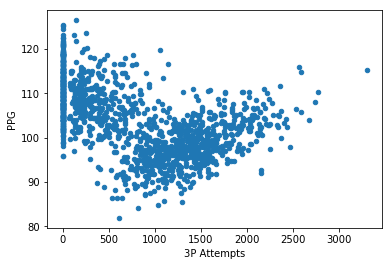

In [10]:
# The 2016-17 Rockets are a massive outlier. 
# They have taken way more 3 point attempts than anyone else.
data.plot.scatter(x='3P Attempts', y='PPG')
data[data['3P Attempts'] > 3000]

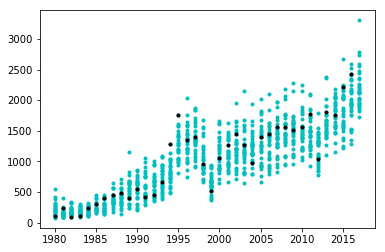

In [11]:
three_data = data[data.Year > 1979]
champ_three = data[(data.Year > 1979) & (data.Champion == True)]
plt.plot(three_data['Year'], three_data['3P Attempts'], 'c.')
plt.plot(champ_three['Year'],champ_three['3P Attempts'], 'k.')

In [12]:
data[data['3P Attempts'] > 3000]

Team    Year  Wins Champion  MVP  Scoring Leader  \
1314  Houston Rockets  2017.0  55.0    False  0.0             0.0   

      Rebound Leader  Assist Leader  WS Leader  DPOY    ...      2P Attempts  \
1314             0.0            1.0        1.0   0.0    ...           3846.0   

        2P%    FT%   RPG   APG  STL  BLK  TOVPG    PPG  Accolades  
1314  0.552  0.766  44.4  25.2  8.2  4.3   15.1  115.3        5.0  

[1 rows x 29 columns]

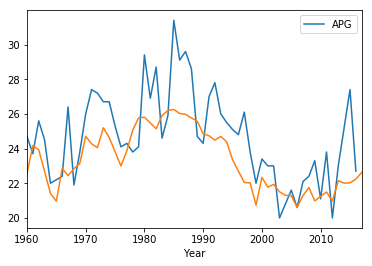

In [13]:
data[data['Champion'] == True].plot(x='Year', y='APG')
data.groupby('Year')['APG'].mean().plot()

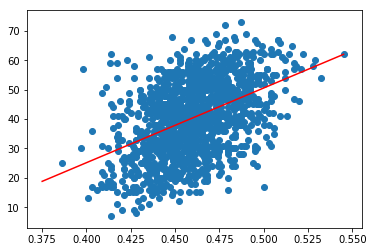

In [14]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame({"FG%": np.arange(0.375, 0.55, 0.01)})
model = LinearRegression()
model.fit(data[['FG%']], data['Wins'])
y_pred = model.predict(X)



plt.plot(X, y_pred, 'r-')
plt.scatter(x=data['FG%'], y=data['Wins'])

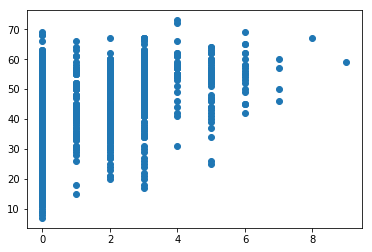

In [15]:
plt.scatter(x=data['All-NBA'], y=data['Wins'])

In [16]:
#The Timberwolves are the worst franchise ever.  
#Lakers and Spurs have long history of success
#OKC are a very young franchise, have had Kevin Durant for most of the time, 
#Russell Westbrook the whole time
data.groupby('Team')['Wins'].mean().sort_values()

Team
Minnesota Timberwolves    31.357143
Los Angeles Clippers      32.340426
Memphis Grizzlies         33.500000
Brooklyn Nets             33.658537
Charlotte Hornets         35.259259
Sacramento Kings          35.982759
Toronto Raptors           36.565217
                            ...    
Portland Trail Blazers    43.234043
Utah Jazz                 43.395349
Oklahoma City Thunder     43.720000
Phoenix Suns              43.795918
Boston Celtics            48.254237
Los Angeles Lakers        48.775862
San Antonio Spurs         50.414634
Name: Wins, dtype: float64

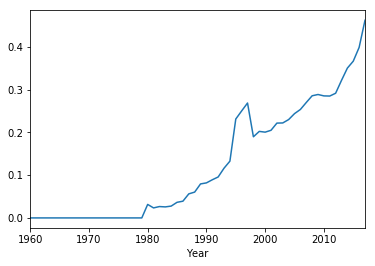

In [17]:
#Importance of 3 pointers in the game has steadily increased
#Interesting to see a drop from 1997, the year that the 3p line
#distance went back up to its normal distance. The line was shortened
#to increase scoring
attempts = data.groupby('Year')['3P Attempts'].mean() / data.groupby('Year')['2P Attempts'].mean()
attempts.plot()

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X=data[['Wins']], y=data['Champion'])
model.coef_


array([[ 0.09523863]])

In [19]:
model.predict_proba([[58]])

array([[ 0.86677321,  0.13322679]])

In [20]:
cavs = data[data.Team == 'Cleveland Cavaliers']
warriors = data[data.Team == 'Golden State Warriors']

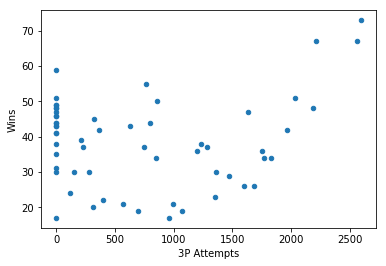

In [21]:
warriors.plot.scatter(x='3P Attempts', y='Wins')

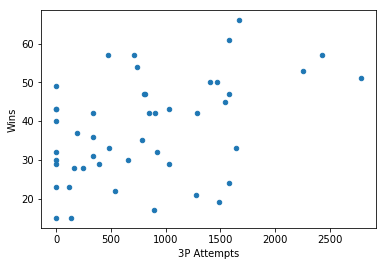

In [22]:
cavs.plot.scatter(x='3P Attempts', y='Wins')

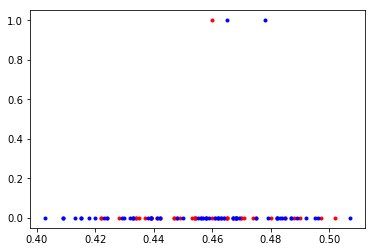

In [23]:

plt.plot(cavs['FG%'], cavs['Champion'], 'r.')
plt.plot(warriors['FG%'], warriors['Champion'], 'b.')

In [24]:
champs = data[data.Champion]
others = data[data.Champion == False]

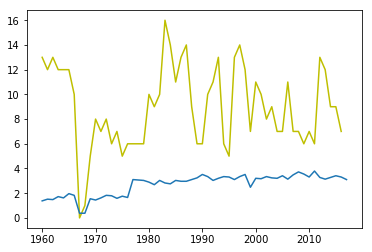

In [25]:
plt.plot(champs['Year'], champs['Accolades'], 'y')
plt.plot(range(1960,2018), others.groupby('Year')['Accolades'].sum()/29)

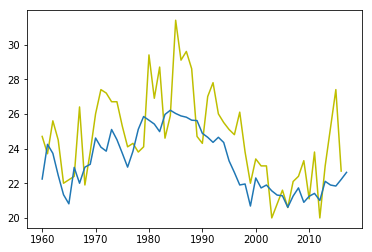

In [26]:
plt.plot(champs['Year'], champs['APG'], 'y')
plt.plot(range(1960,2018), others.groupby('Year')['APG'].mean())

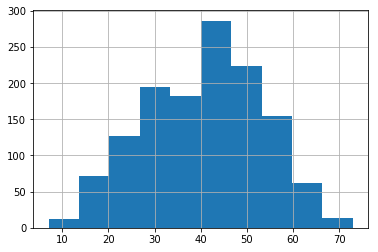

In [27]:
data['Wins'].hist()


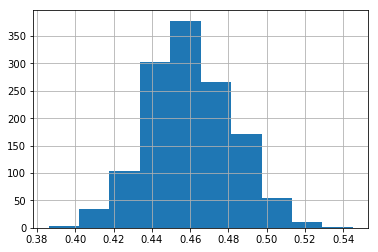

In [28]:
data['FG%'].hist()

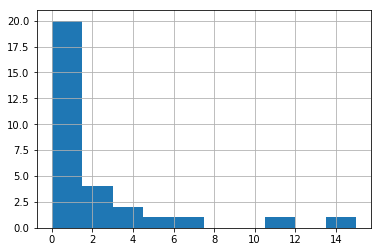

In [29]:
data.groupby('Team')['Champion'].sum().hist()

In [130]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["2P Attempts"], data.Wins)
line = slope*data["2P Attempts"]+intercept

traces = [
    Scatter({
            'x' : data['2P Attempts'],
            'y' : data['Wins'],
            'mode' : 'markers',
            'marker' : {'color' : 'lightblue'},
            'name' : 'Data'
        }),
    Scatter({
        'x' : data["2P Attempts"], 
        'y' : line, 
        'mode' : 'lines',
        'marker' : {'color' : 'violet'},
        'name' : 'Fit'
    })
]

In [131]:
layout = Layout({
        'title' : "2 Points Attempt vs. Number of Wins",
        'xaxis' : {'title' : '2 Points Attempt'},
        'yaxis' : {'title' : 'Number of Wins'}
    })

fig = Figure(data = traces, layout = layout)

py.iplot(fig)

### As the Golden State Warriors and Cleveland Cavaliers are 2 of the most strongest teams recently. They were the NBA champion in 2015 and 2016. We're interested in how many matchs do they win based on their 2 points attempts from 2010-2017

In [78]:
# Copy calculation of split_traces.
further_split_traces = []
combinations = ["Golden State Warriors","Cleveland Cavaliers"]

for team in combinations:
    further_split_traces.append(
        Scatter({
                'x' : np.arange(2010,2018),
                'y' : data["2P Attempts"][(data.Team == team) & (data.Year >= 2010)],
                'mode' : 'markers',
                'name' : team ,
                'marker' : {'color' : 'red' if team == "Cleveland Cavaliers" else 'yellow',
                            'size' : data["Wins"][(data.Team == team) & (data.Year >= 2010)]},
                
            })
    )

In [81]:
# Create a layout, as earlier.
interactive_layout = Layout({
        'title' : "Year vs. 2 Points Attempts",
        'xaxis' : {'title' : 'Year'},
        'yaxis' : {'title' : '2 Points Attempts'},
        'updatemenus' : [{
                'x' : -0.15,
                'y' : 1,
                'yanchor' : 'top',  
                #'buttons' : buttons
            }]
    })


In [82]:
# Create a new figure and plot it.
interactive_fig = Figure(data = further_split_traces, layout= interactive_layout)
py.iplot(interactive_fig)

- In this plot, the size displays the number of wins. According to the plot, the less 2 points the Warriors try to make, the more wins they have. Thus, they tend to decrease their 2 points attempt over years.
- The Cavs also shows the same tendency since they didn't have many wins before 2015. Since 2015, they have made less 2 points attempt and started to win more.

In [132]:
# Copy calculation of split_traces.
further_split_traces = []
combinations = ["Golden State Warriors","Cleveland Cavaliers"]

for team in combinations:
    further_split_traces.append(
        Scatter({
                'x' : np.arange(2010,2018),
                'y' : data["3P Attempts"][(data.Team == team) & (data.Year >= 2010)],
                'mode' : 'markers',
                'name' : team ,
                'marker' : {'color' : 'red' if team == "Cleveland Cavaliers" else 'yellow',
                            'size' : data["Wins"][(data.Team == team) & (data.Year >= 2010)]},
                
            })
    )
    
# Create a layout, as earlier.
interactive_layout = Layout({
        'title' : "Year vs. 3P Attempts",
        'xaxis' : {'title' : 'Year'},
        'yaxis' : {'title' : '3P Attempts'},
        'updatemenus' : [{
                'x' : -0.15,
                'y' : 1,
                'yanchor' : 'top',  
                #'buttons' : buttons
            }]
    })

# Create a new figure and plot it.
interactive_fig = Figure(data = further_split_traces, layout= interactive_layout)
py.iplot(interactive_fig)

In [120]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["2P Attempts"], data.PPG)
line = slope*data["2P Attempts"]+intercept

traces = [
    Scatter({
            'x' : data["2P Attempts"],
            'y' : data.PPG,
            'mode' : 'markers',
            'name' : 'Data'
        }),
    Scatter({
            'x' : data["2P Attempts"], 
            'y' : line, 
            'mode' : 'lines',
            'marker' : {'color' : 'violet'},
            'name' : 'Fit'
        })
]

layout = Layout({
        'title' : "2 Points Attempt vs. Points per game",
        'xaxis' : {'title' : '2 Points Attempt'},
        'yaxis' : {'title' : 'Points per game'}
    })

fig = Figure(data = traces, layout = layout)

py.iplot(fig)

In [116]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.RPG[data.Year >= 2000], data.PPG[data.Year >= 2000])
line = slope*data.RPG[data.Year >= 2000]+intercept

# Copy calculation of split_traces.
traces = [
    Scatter({
            'x' : data.RPG[data.Year >= 2000],
            'y' : data.PPG[data.Year >= 2000],
            'mode' : 'markers',
            'name' : 'Data'
        }),
    Scatter({
            'x' : data.RPG[data.Year >= 2000],
            'y' : line, 
            'mode' : 'lines',
            'marker' : {'color' : 'orange'},
            'name' : 'Fit'
        })
]

layout = Layout({
        'title' : "RPG vs. PPG",
        'xaxis' : {'title' : 'RPG'},
        'yaxis' : {'title' : 'PPG'}
    })

fig = Figure(data = traces, layout = layout)

py.iplot(fig)